# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe illness. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** are serious cases that the world has faced. <br> **SARS-CoV-2 (n -coronavirus)** is a new virus of the coronavirus family, *first discovered* in 2019, not previously identified in humans.

It is a *contagious* virus that started in **Wuhan** in **December 2019**. It was later declared a Pandemic by the WHO due to the high rate of worldwide spread. Currently (on April 21, 2021) this results in a total of 500,000+ deaths globally. <br>

The pandemic is spreading worldwide; awareness of this contagion becomes more important. This NoteBook is an attempt to analyze cumulative data of confirmed, fatal and recovered cases over time.
      <br>
    <font face = "Verdana" size ="1">
     <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
     </font>
  <center><font face = "Verdana" size ="4"> Be strong, world! Be safe and healthy. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)

* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)

* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Installments Prerequisite
**pycountry_convert**: Using country data from wikipedia, this package provides conversion functions between ISO country names, country codes and continent names.

**folium, seaborn, plotly**: Several visualization packages in Python.

Uncomment and install some packages if you don't already have them installed. If not, continue.

In [1]:
!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download the dataset and data inspection

This dataset is updated daily by Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Data inspection:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [6]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [5]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

## First and last date of each datasets:

In [6]:
print(confirmed_df.iloc[:,[4,-1]].columns)
print(deaths_df.iloc[:,[4,-1]].columns)
print(recoveries_df.iloc[:,[4,-1]].columns)

Index(['1/22/20', '8/4/21'], dtype='object')
Index(['1/22/20', '8/4/21'], dtype='object')
Index(['1/22/20', '8/4/21'], dtype='object')


So we can see that all 3 datasets start from January 22, 2020 and end on August 4, 2021.

## Number of countries in datasets:

In [39]:
print(confirmed_df.iloc[:,1].nunique())
print(deaths_df.iloc[:,1].nunique())
print(recoveries_df.iloc[:,1].nunique())

201
201
201


So there are a total of 201 countries in each dataset.

## Total number of days in datasets:

In [7]:
date = pd.to_datetime(confirmed_df.iloc[:,4:].columns)
print("Total day of confirmed_df:", max(date)-min(date))

date = pd.to_datetime(deaths_df.iloc[:,4:].columns)
print("Total day of deaths_df:", max(date)-min(date))

date = pd.to_datetime(recoveries_df.iloc[:,4:].columns)
print("Total day of recoveries_df:", max(date)-min(date))

Total day of confirmed_df: 560 days 00:00:00
Total day of deaths_df: 560 days 00:00:00
Total day of recoveries_df: 560 days 00:00:00


There are 560 days in each dataset.

## Inspect whether there are duplicates value in dataset:

In [9]:
country = pd.DataFrame(confirmed_df['Country/Region'].value_counts())
print(country)

                Country/Region
China                       34
Canada                      16
United Kingdom              15
France                      12
Australia                    8
...                        ...
Guinea                       1
Guinea-Bissau                1
Guyana                       1
Haiti                        1
Zimbabwe                     1

[201 rows x 1 columns]


So there are some countries that appear duplicate in the data.

# Inspect these duplications:

In [16]:
condition = confirmed_df['Country/Region'].isin(country[country['Country/Region'] > 1].index)
confirmed_df[condition].head(10)

Province/State Country/Region      Lat      Long  1/22/20  \
9   Australian Capital Territory      Australia -35.4735  149.0124        0   
10               New South Wales      Australia -33.8688  151.2093        0   
11            Northern Territory      Australia -12.4634  130.8456        0   
12                    Queensland      Australia -27.4698  153.0251        0   
13               South Australia      Australia -34.9285  138.6007        0   
14                      Tasmania      Australia -42.8821  147.3272        0   
15                      Victoria      Australia -37.8136  144.9631        0   
16             Western Australia      Australia -31.9505  115.8605        0   
40                       Alberta         Canada  53.9333 -116.5765        0   
41              British Columbia         Canada  53.7267 -127.6476        0   

    1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  \
9         0        0        0        0        0  ...      124      124   
10        0        0        0        3        4  ...     8118     8294   
11        0        0        0        0        0  ...      192      192   
12        0        0        0        0        0  ...     1770     1790   
13        0        0        0        0        0  ...      856      857   
14        0        0        0        0        0  ...      234      234   
15        0        0        0        1        1  ...    20924    20932   
16        0        0        0        0        0  ...     1048     1050   
40        0        0        0        0        0  ...   233547   233681   
41        0        0        0        0        0  ...   149109   149259   

    7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
9       124      124      124      124     124     124     124     124  
10     8531     8703     8915     9153    9360    9562    9795   10063  
11      197      197      197      199     200     200     198     198  
12     1791     1793     1800     1809    1824    1840    1859    1886  
13      859      859      859      859     862     863     866     866  
14      234      234      234      234     234     234     234     235  
15    20939    20942    20944    20948   20950   20955   20955   20961  
16     1051     1057     1057     1057    1058    1058    1058    1058  
40   233875   234108   234295   234295  234295  234295  235038  235244  
41   149444   149646   149889   149889  149889  149889  150631  150973  

[10 rows x 565 columns]

From the data above, we can understand that duplicates countries exists because those country not only record total value of the entire nation but instead, record these values based on each proince/state 

# Data that were being stored by country:

In [145]:
country[country['Country/Region'] == 1]

Country/Region
Panama                        1
Niger                         1
Nigeria                       1
North Macedonia               1
Norway                        1
...                         ...
Guinea                        1
Guinea-Bissau                 1
Guyana                        1
Haiti                         1
Zimbabwe                      1

[193 rows x 1 columns]

## Countries with the most Covid cases:

In [183]:
confirmed_df.iloc[:,[1,-1]].groupby('Country/Region').sum().sort_values(by = '8/4/21', ascending=True).tail(1)

8/4/21
Country/Region          
USA             35460776

## Number of day with the most Covid cases:

In [107]:
#crate a df contains total cases by date
cases_by_date = pd.DataFrame(confirmed_df.iloc[:,4:].transpose().sum(axis=1), columns=['total'])

#create a new columns contains deaths and recovered cases
cases_by_date['deaths'] = deaths_df.iloc[:,4:].transpose().sum(axis=1)
cases_by_date['recoveries'] = recoveries_df.iloc[:,4:].transpose().sum(axis=1)

#cases by date
cases_by_date['remaining'] = cases_by_date['total'] - cases_by_date['deaths'] - cases_by_date['recoveries']
cases_by_date.sort_values(by='remaining', ascending=True).tail(1)

total   deaths  recoveries  remaining
8/4/21  200758588  4283016   130899061   65576511

## Number of days with the most Covid cases:

In [179]:
deaths_df.iloc[:,[1,-1]].groupby('Country/Region').sum().sort_values(by = '8/4/21', ascending=True).tail(1)

8/4/21
Country/Region        
USA             611222

## Some quick inspection of my hometown country, Vietnam:

In [17]:
#total cases
vn_total_cases = confirmed_df[confirmed_df['Country/Region'] == 'Vietnam'].iloc[:,4:].sum(axis=1)
print("Total cases:", vn_total_cases.iloc[0])


#death cases
vn_deaths_cases = deaths_df[deaths_df['Country/Region'] == 'Vietnam'].iloc[:,4:].sum(axis=1)
print("Death cases:", vn_deaths_cases.iloc[0])

#recovery cases
vn_recoveries_cases = recoveries_df[recoveries_df['Country/Region'] == 'Vietnam'].iloc[:,4:].sum(axis=1)
print("Recoveries:", vn_recoveries_cases.iloc[0])

#remaining cases
vn_remaining_cases = vn_total_cases.iloc[0] - (vn_deaths_cases.iloc[0] + vn_recoveries_cases.iloc[0])
print("Remaining cases:", vn_remaining_cases)

Total cases: 3540076
Death cases: 29256
Recoveries: 1261448
Remaining cases: 2249372


#  4. Global Inspection

## Metrics designation


In [18]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

#total cases
total_cases = np.array(confirmed.sum(axis=0).tolist())
total_deaths = np.array(deaths.sum(axis=0).tolist())
total_recovered = np.array(recoveries.sum(axis=0).tolist())
total_active = total_cases - (total_deaths + total_recovered)

#mortality + recovery rate
mortality_rate = total_deaths/total_cases
recovery_rate = total_recovered/total_cases

#date adjustment
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

In [10]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## General Summary

  Visualize counts and log(10) total cases, total deaths, total recoveries, and total active treatment over time (day units).

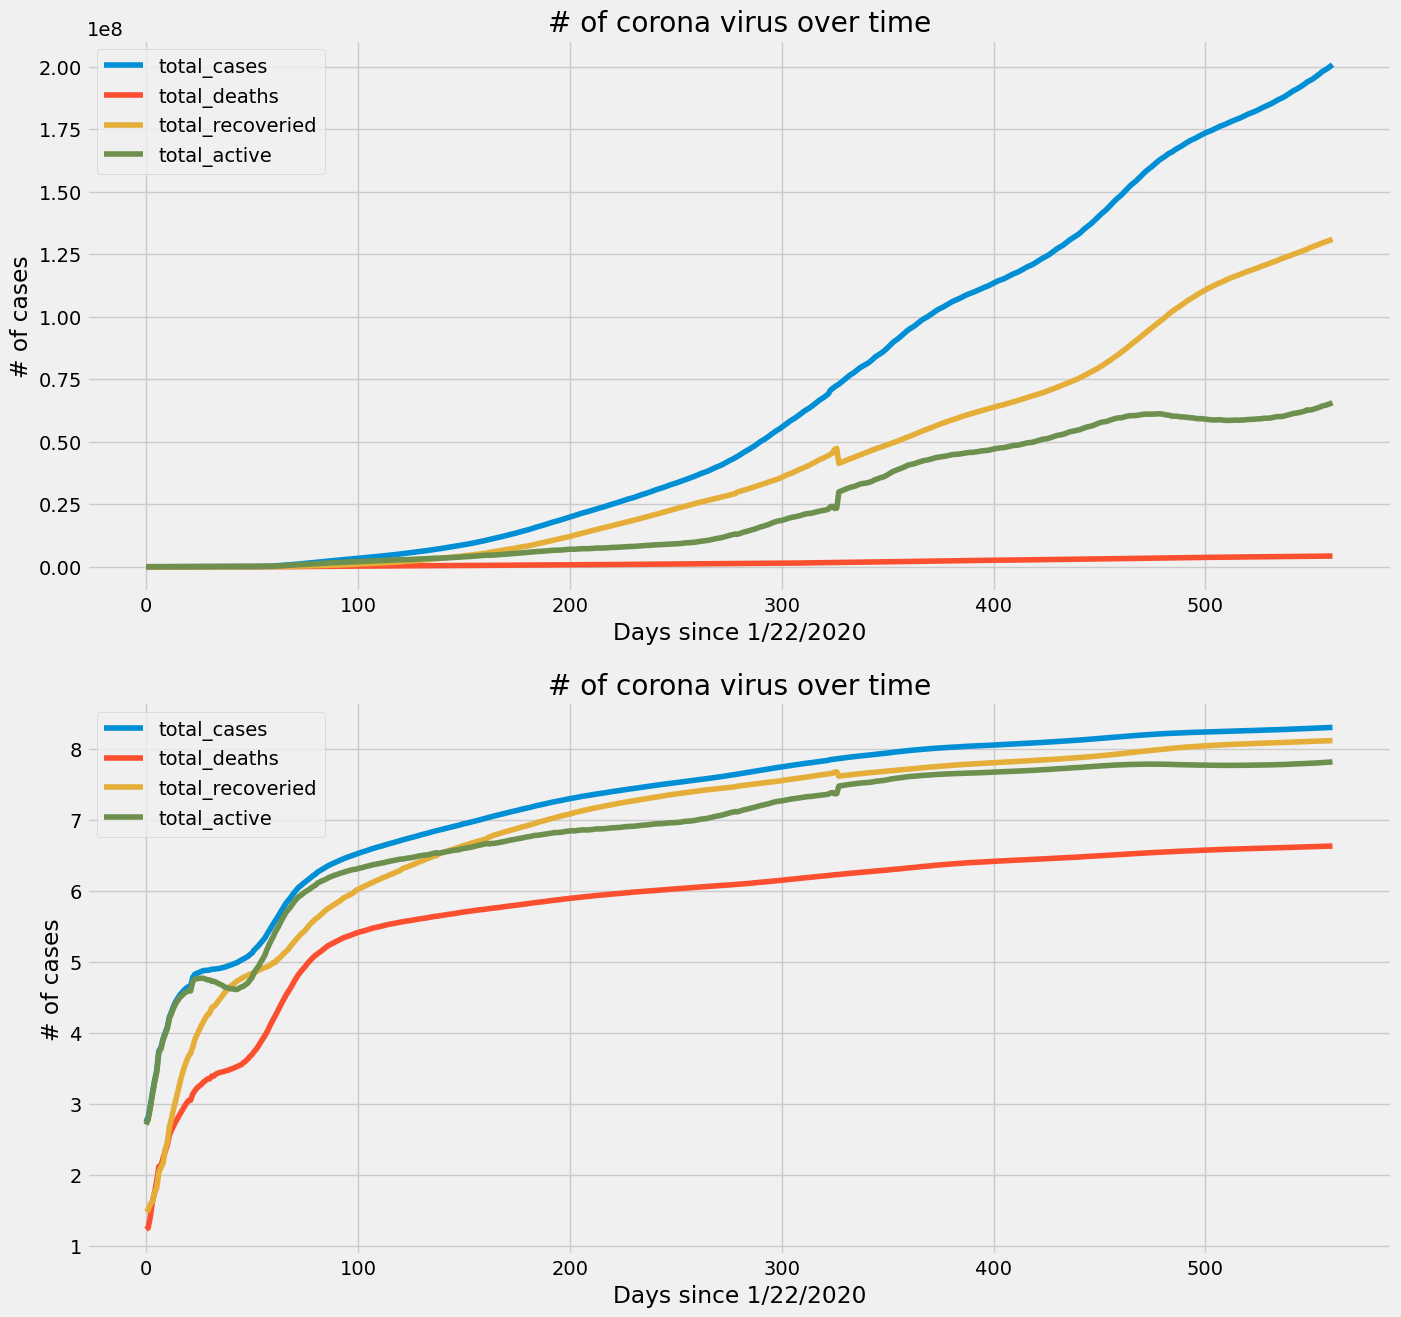

In [197]:
#set_subplot
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)

#first plot
ax1.plot(adjusted_dates, total_cases, label= 'total_cases')
ax1.plot(adjusted_dates, total_deaths, label= 'total_deaths')
ax1.plot(adjusted_dates, total_recovered, label= 'total_recoveried')
ax1.plot(adjusted_dates, total_active, label = 'total_active')

ax1.set_title("# of corona virus over time")
ax1.set_xlabel('Days since 1/22/2020')
ax1.set_ylabel('# of cases')
ax1.legend()

#second plot
ax2.plot(adjusted_dates, np.log10(total_cases), label = 'total_cases')
ax2.plot(adjusted_dates, np.log10(total_deaths), label = 'total_deaths')
ax2.plot(adjusted_dates, np.log10(total_recovered), label = 'total_recoveried')
ax2.plot(adjusted_dates, np.log10(total_active), label = 'total_active')

ax2.set_title("# of corona virus over time")
ax2.set_xlabel('Days since 1/22/2020')
ax2.set_ylabel("# of cases")
ax2.legend()

#display
plt.show()

Visualize total cases, total deaths, total recoveries and total active treatment over time (in days).

In [337]:
#set_subplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_figheight(50)
fig.set_figwidth(30)

#first plot
ax1.plot(adjusted_dates, total_cases, label= 'total_cases')

ax1.set_title("# of coronavirus Case over time")
ax1.set_xlabel('Days since 1/22/2020')
ax1.set_ylabel('# of Cases')
ax1.legend()

#second plot
ax2.plot(adjusted_dates, total_deaths, label= 'death_cases')

ax2.set_title("# of coronavirus Deaths over time")
ax2.set_xlabel('Days since 1/22/2020')
ax2.set_ylabel('# of Cases')
ax2.legend()

#third plot
ax3.plot(adjusted_dates, total_recovered, label= 'total_recovered')

ax3.set_title("# of coronavirus Recoveries over time")
ax3.set_xlabel('Days since 1/22/2020')
ax3.set_ylabel('# of Cases')
ax3.legend()

#fourth plot
ax4.plot(adjusted_dates, total_active, label= 'total_active')

ax4.set_title("# of corona virus Active over time")
ax4.set_xlabel('Days since 1/22/2020')
ax4.set_ylabel('# of Cases')
ax4.legend()

#display
plt.show()

## Analyze by date

1) Metrics

In [132]:
#zero_np array for the first day
zero = np.array([0])

#increase rate
cases_increase_rate = np.concatenate((zero, total_cases[1:] - total_cases[:len(total_cases)-1]))

deaths_increase_rate = np.concatenate((zero, total_deaths[1:] - total_deaths[:len(total_deaths)-1]))

recoveries_increase_rate = np.concatenate((zero, total_recovered[1:] - total_recovered[:len(total_recovered)-1]))

active_increase_rate = np.concatenate((zero, total_active[1:] - total_active[:len(total_active)-1]), axis=0)

Visualize daily increments of total cases, total deaths, total recoveries, and totals in treatment over time (day units).

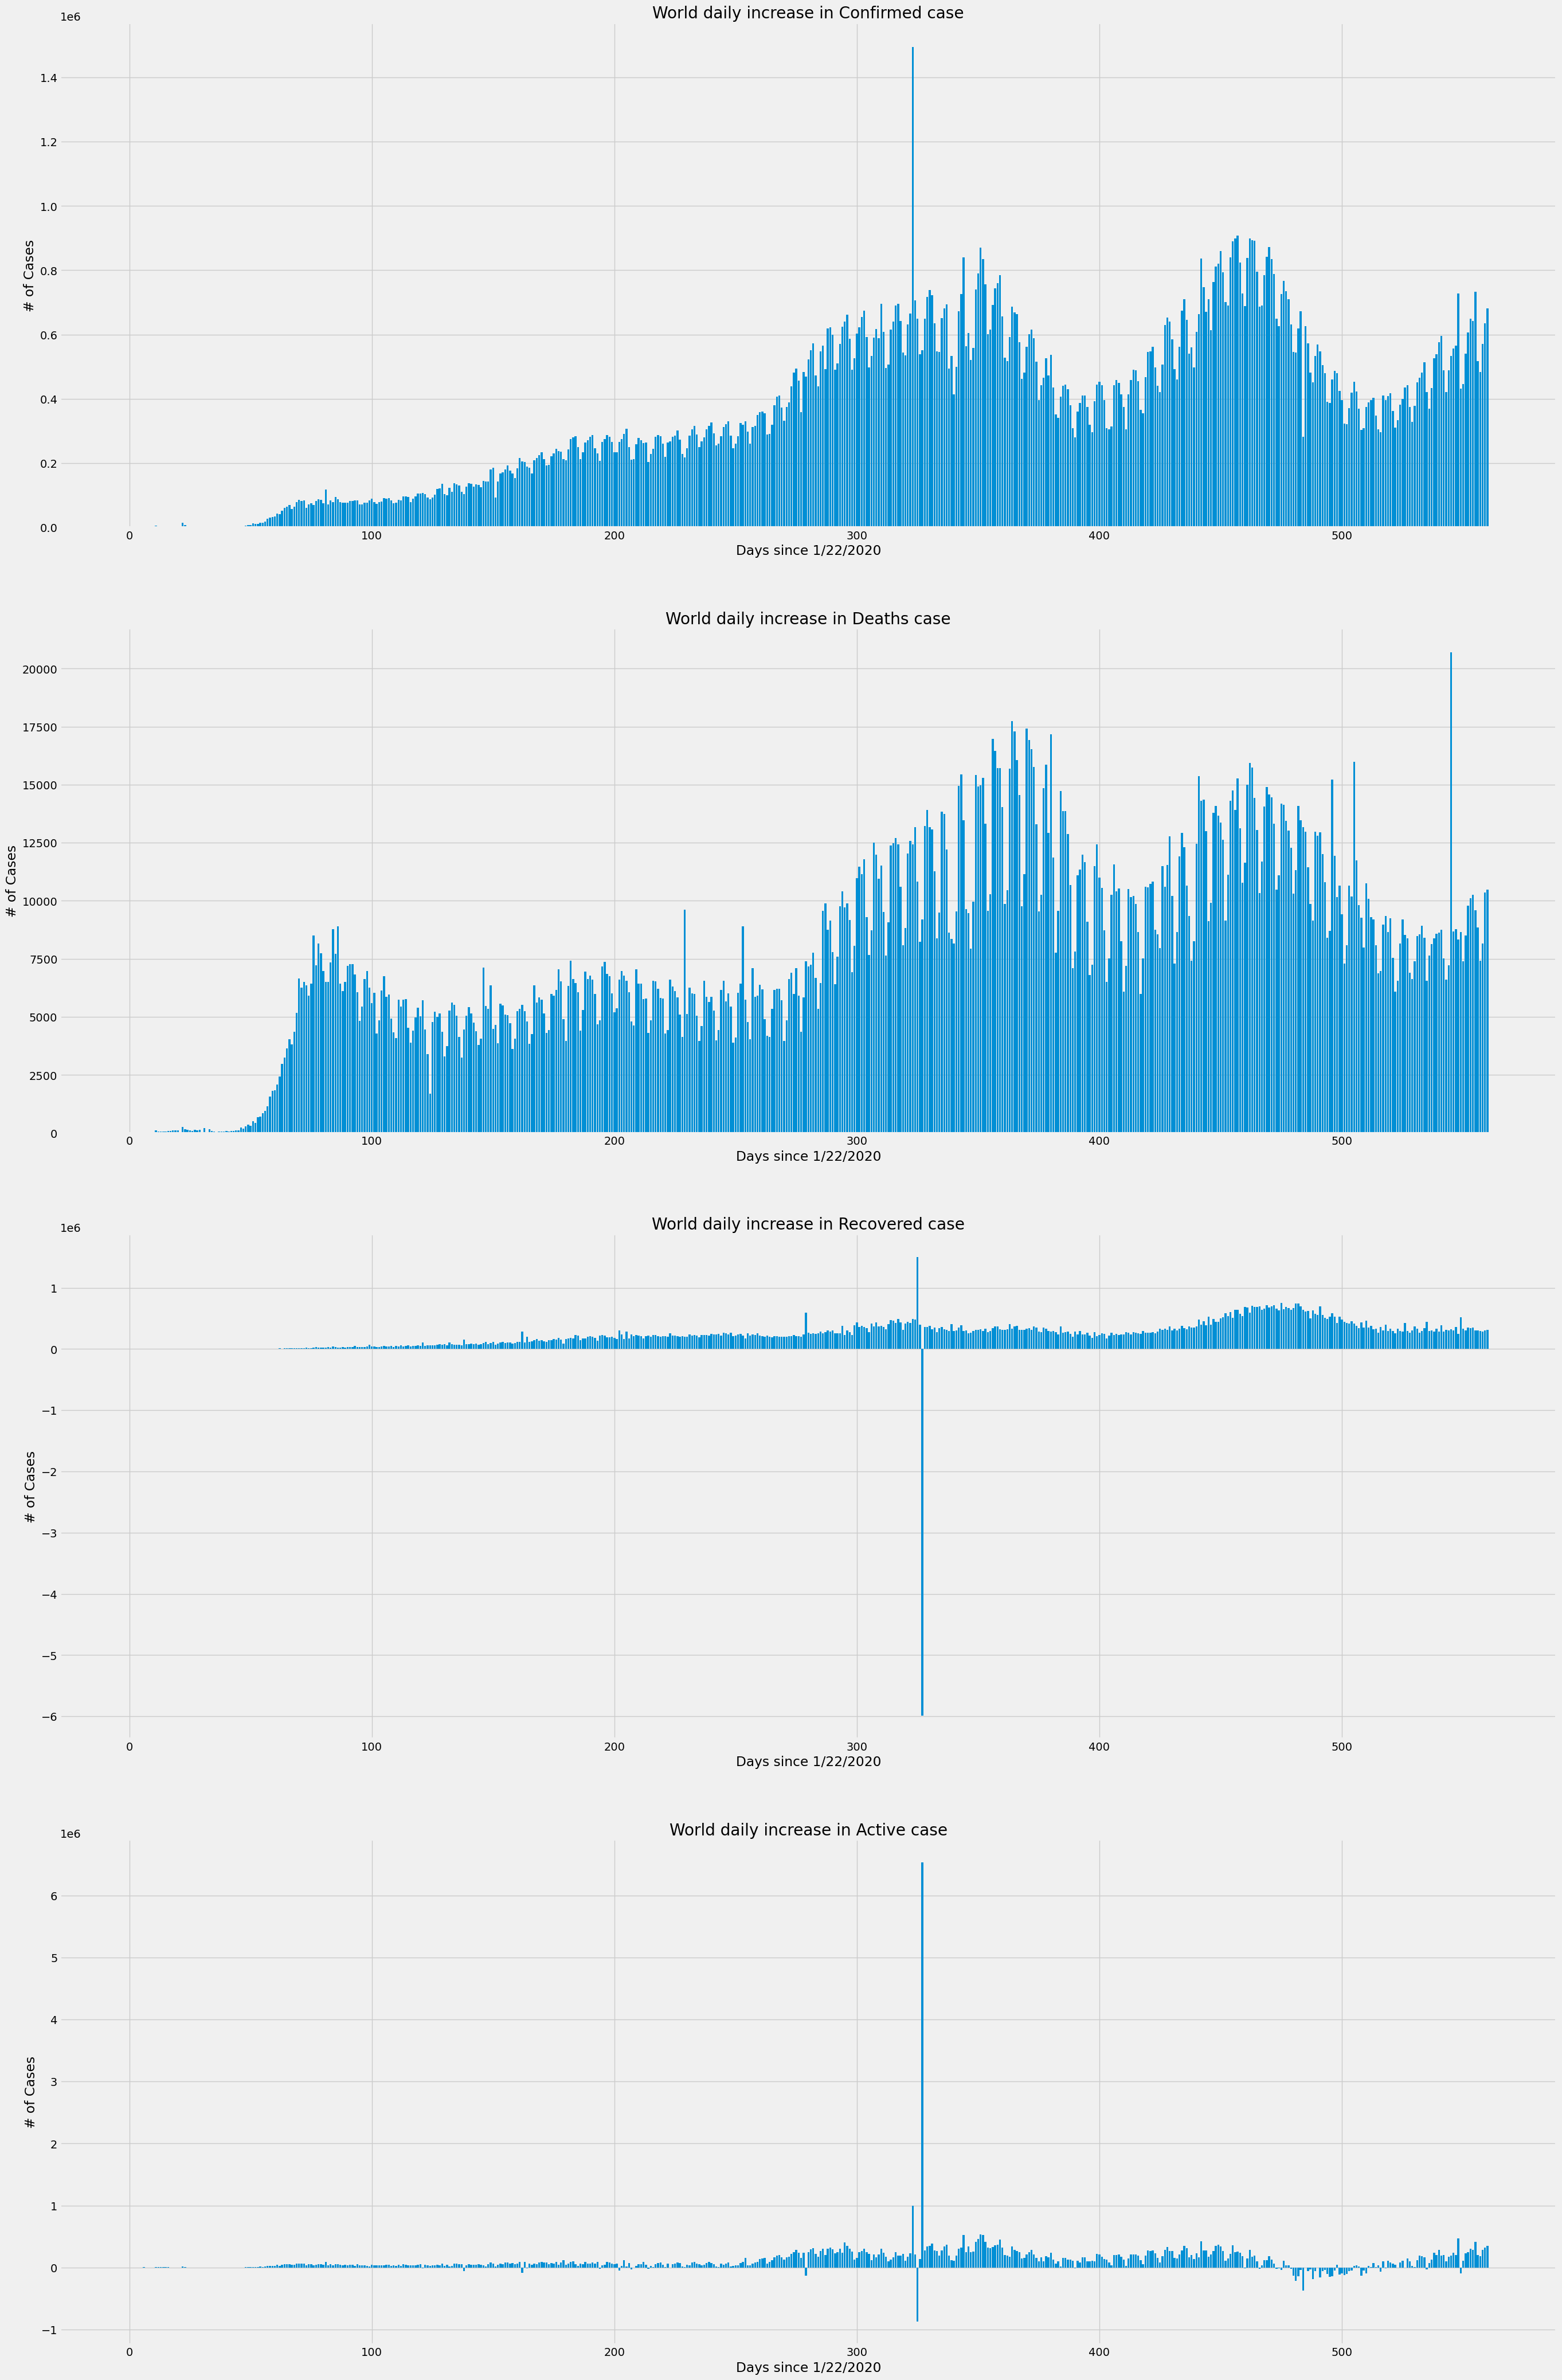

In [61]:
#set_subplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_figheight(50)
fig.set_figwidth(30)

#first plot
ax1.bar(adjusted_dates, cases_increase_rate)

ax1.set_title("World daily increase in Confirmed case")
ax1.set_xlabel('Days since 1/22/2020')
ax1.set_ylabel('# of Cases')

#second plot
ax2.bar(adjusted_dates, deaths_increase_rate)

ax2.set_title("World daily increase in Deaths case")
ax2.set_xlabel('Days since 1/22/2020')
ax2.set_ylabel('# of Cases')

#third plot
ax3.bar(adjusted_dates, recoveries_increase_rate)

ax3.set_title("World daily increase in Recovered case")
ax3.set_xlabel('Days since 1/22/2020')
ax3.set_ylabel('# of Cases')

#fourth plot
ax4.bar(adjusted_dates, active_increase_rate)

ax4.set_title("World daily increase in Active case")
ax4.set_xlabel('Days since 1/22/2020')
ax4.set_ylabel('# of Cases')

#display
plt.show()

In [133]:
#mortality and recovery rate
mortality_rate = (total_deaths/total_cases) * 100
recovery_rate = (total_recovered/total_cases) * 100

#construct a df to visualize
df_death_recovered_rate = pd.DataFrame(index=confirmed_df.iloc[:,4:].columns)
df_death_recovered_rate['mortality_rate'] = mortality_rate
df_death_recovered_rate['recovery_rate'] = recovery_rate

#diplay
df_death_recovered_rate

mortality_rate  recovery_rate
1/22/20        3.052065       5.385996
1/23/20        2.739726       4.870624
1/24/20        2.754237       4.131356
1/25/20        2.922756       2.922756
1/26/20        2.641509       2.641509
...                 ...            ...
7/31/21        2.140535      65.379010
8/1/21         2.139066      65.365611
8/2/21         2.137028      65.320405
8/3/21         2.135428      65.265505
8/4/21         2.133416      65.202222

[561 rows x 2 columns]

# Data Visualization

    Visualize mortality over time (units of days) using a line graph.

     Use dash lines to visualize average mortality at all times.

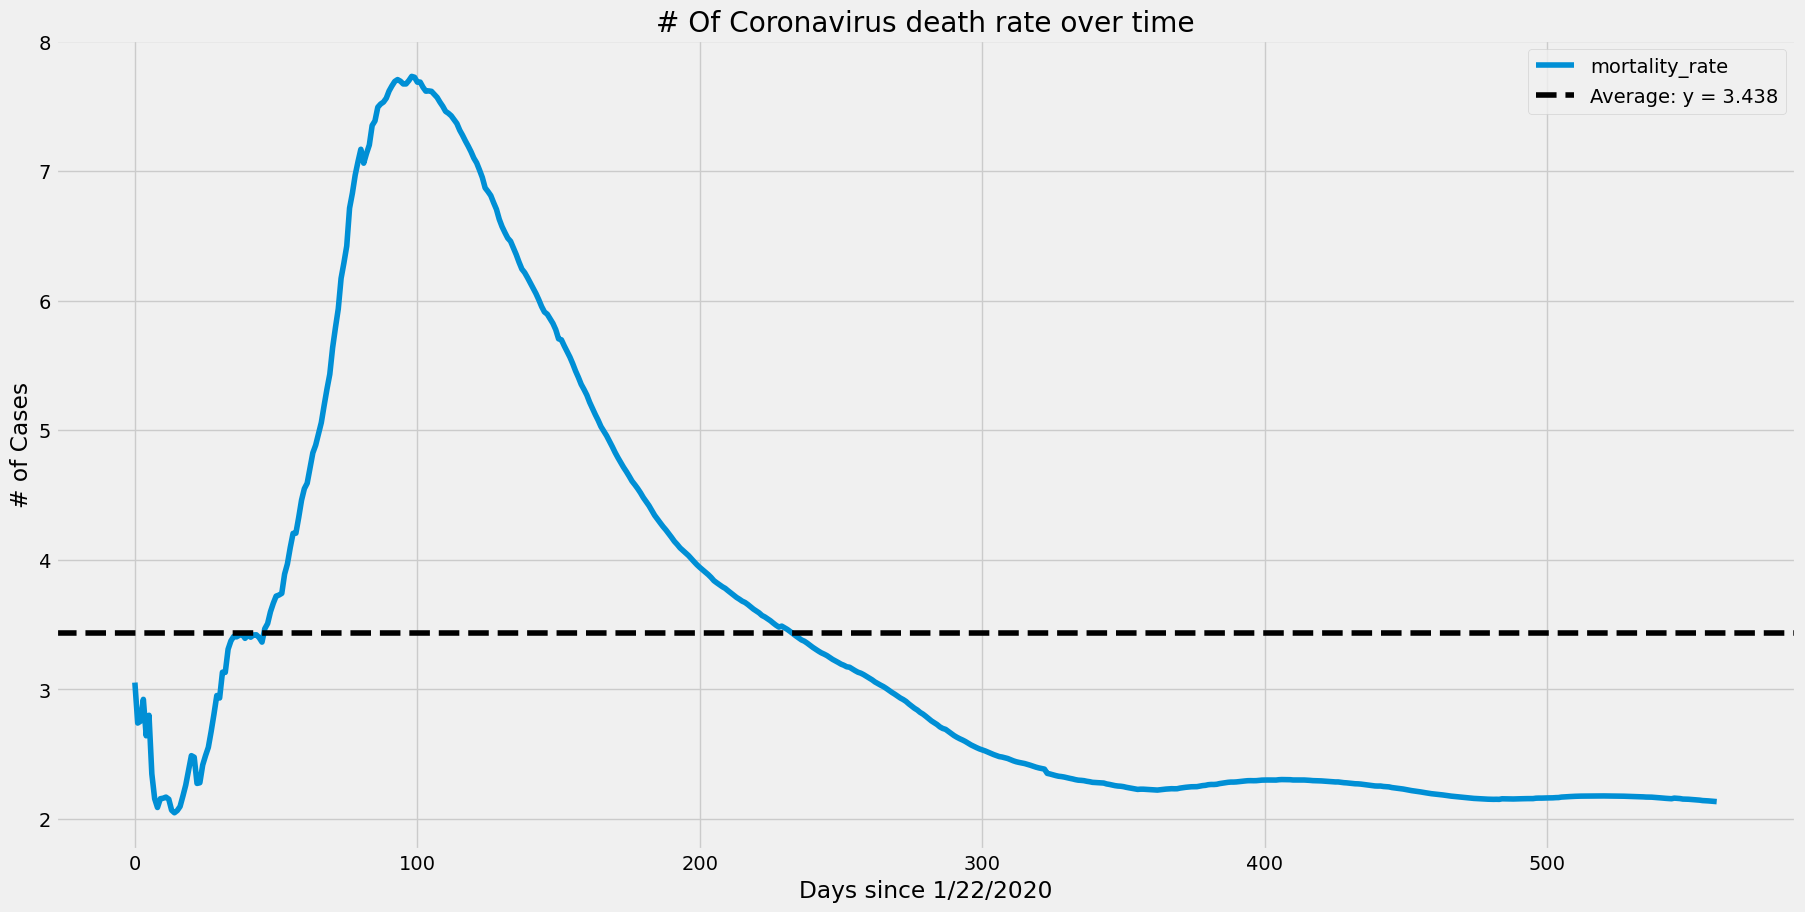

In [99]:
#create plots
plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, mortality_rate, label='mortality_rate')
plt.axhline(y=np.nanmean(mortality_rate), color='black', label = "Average: y = 3.438", linestyle='dashed')

#set tile, label, legend
plt.title("# Of Coronavirus death rate over time",)
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(loc='upper right')

#display
plt.show()

Visualize mortality over time (units of days) using a line graph.

     (Use dash lines to visualize average mortality at all times.)

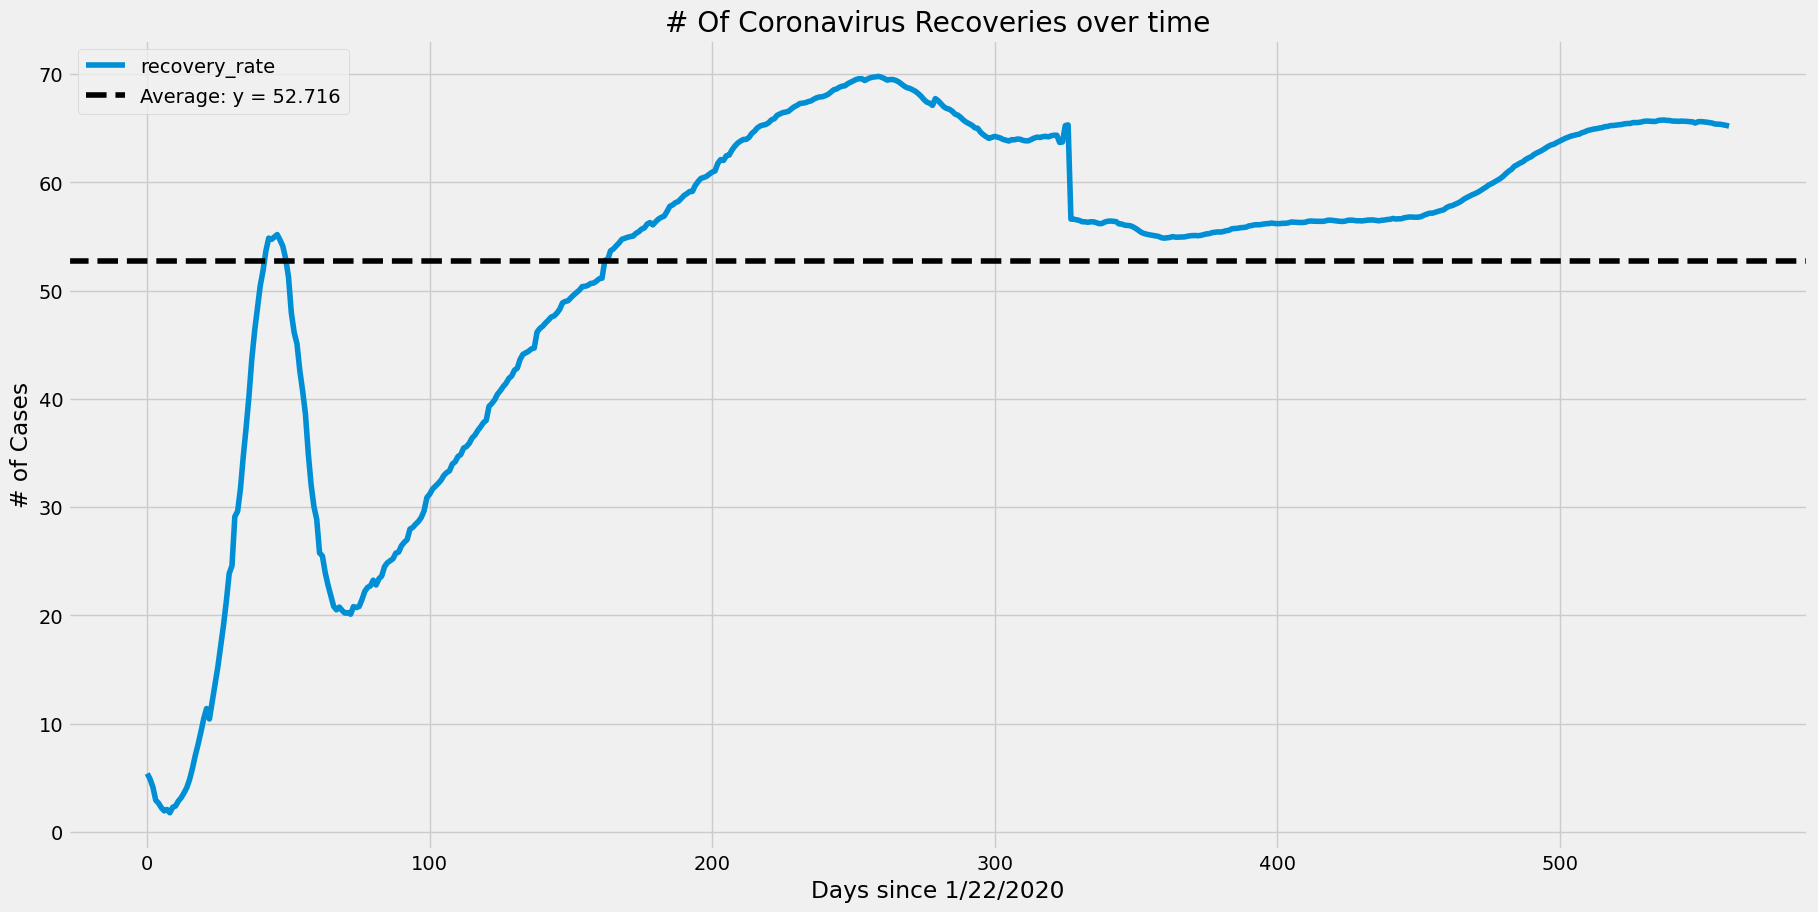

In [100]:
#create plots
plt.figure(figsize=(20,10))
plt.plot(adjusted_dates, recovery_rate, label='recovery_rate')
plt.axhline(y=np.nanmean(recovery_rate), color='black', label = "Average: y = 52.716", linestyle='dashed')

#set tile, label, legend
plt.title("# Of Coronavirus Recoveries over time",)
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(loc='upper left')

#display
plt.show()

#  5. Summary by continent

## Data Preprocessing

In [134]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [147]:
#series of all continents based on province/state
continent_series = confirmed_df['Country/Region'].apply(country_to_continent_code)

#add continent column with specific index
confirmed_df.insert(loc = 2, column='continent', value=continent_series)
confirmed_df['continent'] = confirmed_df['continent'].map(continents)

deaths_df.insert(loc = 2, column='continent', value=continent_series)
deaths_df['continent'] = deaths_df['continent'].map(continents)

recoveries_df.insert(loc = 2, column='continent', value=continent_series)
recoveries_df['continent'] = recoveries_df['continent'].map(continents)
recoveries_df

Province/State        Country/Region continent        Lat        Long  \
0              NaN           Afghanistan      Asia  33.939110   67.709953   
1              NaN               Albania    Europe  41.153300   20.168300   
2              NaN               Algeria    Africa  28.033900    1.659600   
3              NaN               Andorra    Europe  42.506300    1.521800   
4              NaN                Angola    Africa -11.202700   17.873900   
..             ...                   ...       ...        ...         ...   
269            NaN    West Bank and Gaza    Europe  31.952200   35.233200   
270            NaN  Winter Olympics 2022    Europe  39.904200  116.407400   
271            NaN                 Yemen    Europe  15.552727   48.516388   
272            NaN                Zambia    Europe -13.133897   27.849332   
273            NaN              Zimbabwe    Europe -19.015438   29.154857   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  \
0          0        0        0        0        0  ...    82586    82586   
1          0        0        0        0        0  ...   130152   130166   
2          0        0        0        0        0  ...   111322   112050   
3          0        0        0        0        0  ...    14077    14113   
4          0        0        0        0        0  ...    35686    35742   
..       ...      ...      ...      ...      ...  ...      ...      ...   
269        0        0        0        0        0  ...   311526   311560   
270        0        0        0        0        0  ...        0        0   
271        0        0        0        0        0  ...     4166     4168   
272        0        0        0        0        0  ...   182665   183534   
273        0        0        0        0        0  ...    67827    70496   

     7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0      82586    82586    82586    82586   82586   82586   82586   82586  
1     130174   130187   130205   130222  130243  130256  130291  130314  
2     112900   113707   114531   115276  116009  116770  117557  118409  
3      14113    14180    14210    14210   14210   14296   14348   14380  
4      35964    36025    36708    37255   37397   38360   39389   39582  
..       ...      ...      ...      ...     ...     ...     ...     ...  
269   311622   311714   311772   311832  311918  312149  312289  312320  
270        0        0        0        0       0       0       0       0  
271     4168     4171     4171     4185    4200    4212    4232    4251  
272   183957   185210   186211   187236  188106  188950  189341  189658  
273    71383    73394    74562    75856   76665   79420   81570   82994  

[274 rows x 566 columns]

    Create a dataframe country_df with the index field "Country/Region".
     These column information will be:
     - continent: The continent of the country.
     - Cases: Total number of positive cases.
     - Deaths: Total number of deaths.
     - Recoveries: Total number of recoveries
     - Active: Total number of treatments.
     Mortality Rate: Mortality rate in percent.

In [120]:
#Country/Region df
country_df = pd.DataFrame()
country_df['Country/Region'] = confirmed_df['Country/Region'].unique()
country_df['continent'] = country_df['Country/Region'].apply(country_to_continent_code)
country_df['continent'] = country_df['continent'].map(continents)

#total cases
case_by_reg = confirmed_df.iloc[:,[1,-1]].groupby('Country/Region').sum()
country_df = country_df.merge(case_by_reg, on='Country/Region', how='left')
country_df.rename(columns={"8/4/21": "confirmed"}, inplace=True)

#death cases
deaths_by_reg = deaths_df.iloc[:,[1,-1]].groupby('Country/Region').sum()
country_df = country_df.merge(deaths_by_reg, on='Country/Region', how='left')
country_df.rename(columns={"8/4/21": "deaths"}, inplace=True)

#recoveries cases
recoveries_by_reg = recoveries_df.iloc[:,[1,-1]].groupby('Country/Region').sum()
country_df = country_df.merge(recoveries_by_reg, on='Country/Region', how='left')
country_df.rename(columns={"8/4/21": "recoveries"}, inplace=True)

#Active
country_df['active'] = country_df['confirmed'] - (country_df['deaths'] + country_df['recoveries'])

#Morality Rate
country_df['mortality_rate'] = (country_df['deaths']/country_df['confirmed']) * 100

#display
country_df.set_index('Country/Region', inplace=True)
country_df.fillna(0, inplace=True)
country_df

continent  confirmed  deaths  recoveries  active  \
Country/Region                                                          
Afghanistan               Asia     148933    6836       82586   59511   
Albania                 Europe     133310    2457      130314     539   
Algeria                 Africa     176724    4404      118409   53911   
Andorra                 Europe      14797     128       14380     289   
Angola                  Africa      43158    1026       39582    2550   
...                        ...        ...     ...         ...     ...   
West Bank and Gaza      Others     317404    3609      312320    1475   
Winter Olympics 2022    Others          0       0           0       0   
Yemen                     Asia       7096    1380        4251    1465   
Zambia                  Africa     197791    3430      189658    4703   
Zimbabwe                Africa     113526    3711       82994   26821   

                      mortality_rate  
Country/Region                        
Afghanistan                 4.589983  
Albania                     1.843073  
Algeria                     2.492021  
Andorra                     0.865040  
Angola                      2.377311  
...                              ...  
West Bank and Gaza          1.137037  
Winter Olympics 2022        0.000000  
Yemen                      19.447576  
Zambia                      1.734154  
Zimbabwe                    3.268855  

[201 rows x 6 columns]

    Create a dataframe Continental_df with the index as the "continent" field.
     These column information will be:

      - Confirmed: Continent country.
      - Deaths: Total number of deaths.
      - Recoveries: Total number of recovery times.
      - Active: Total number of treatments.
      - Mortality Rate: Mortality rate in percent.

In [102]:
continent_df = country_df.groupby('continent').agg({'confirmed':'sum', 'deaths':"sum", "recoveries":"sum",\
                                     "active":"sum", "mortality_rate" : "mean"})
continent_df

confirmed   deaths  recoveries    active  mortality_rate
continent                                                              
Africa           6855602   174000     5955131    726471        2.129152
Asia            62536726   902952    57853343   3780431        1.919800
Australia          90000     1425       55290     33285        2.177674
Europe          52448545  1167140    27947075  23334330        1.915473
North America   42351963   924518     5776939  35650506        2.056954
Others            753558    16614      654615     82329        2.808817
South America   35722194  1096367    32656668   1969159        3.356020

## Data Visualization

Functions for better plotting:

In [161]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

    
    
def visualize_covid_cases(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    
    #plot fig
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    #params
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    
    #check params
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    
    #params
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    
    #calculate input for plot
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
            
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
        
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
    
    #text appeared
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries: " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



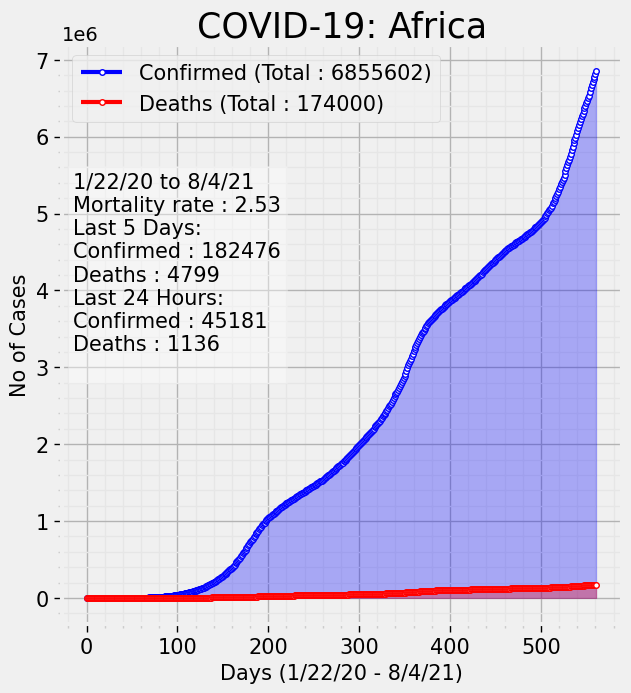

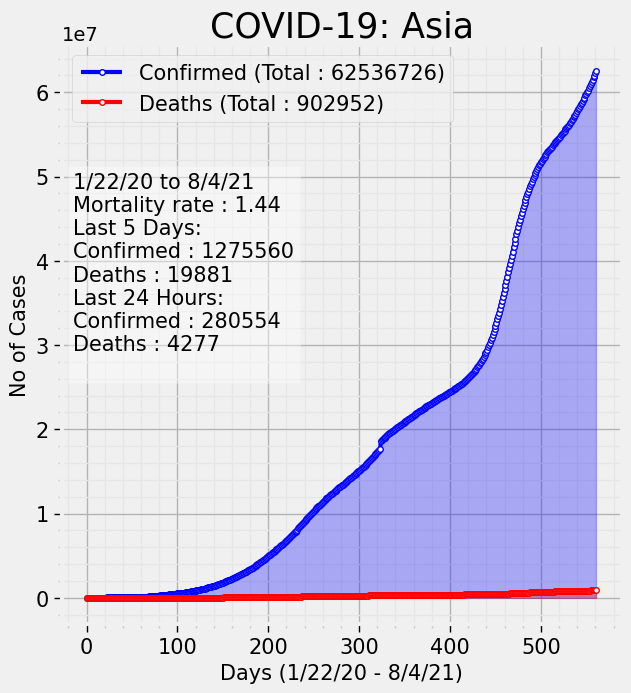

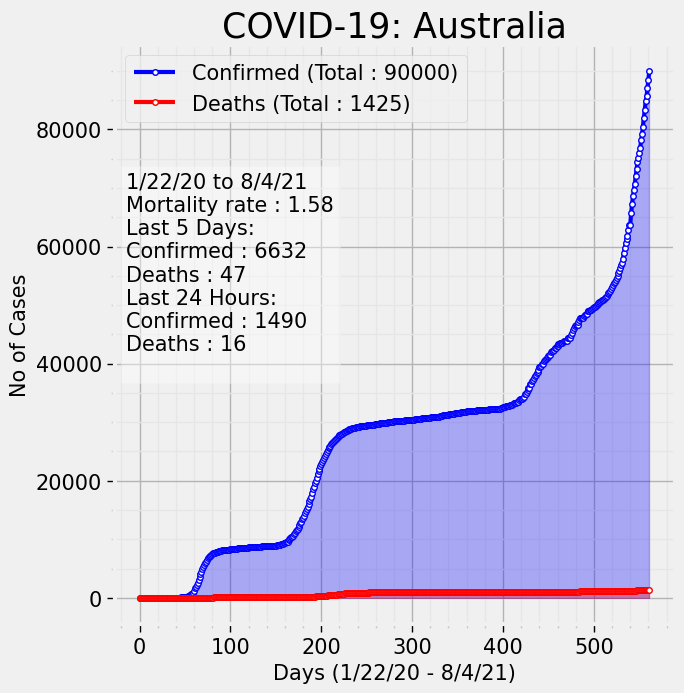

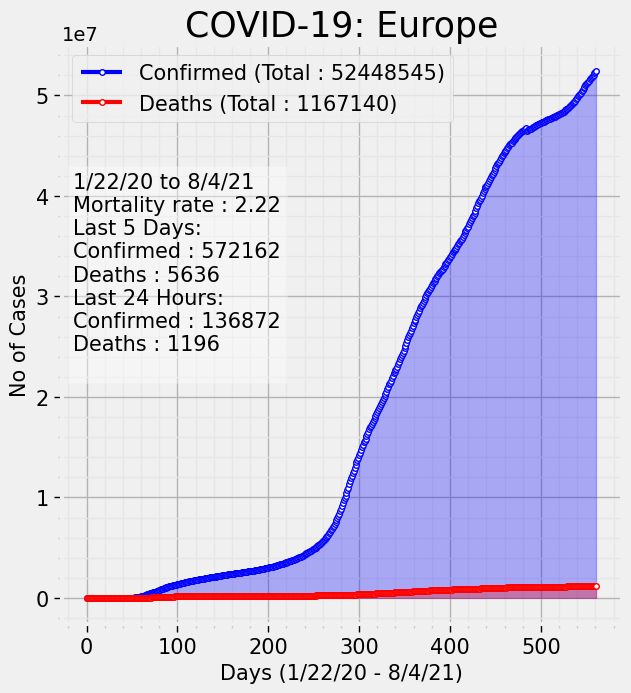

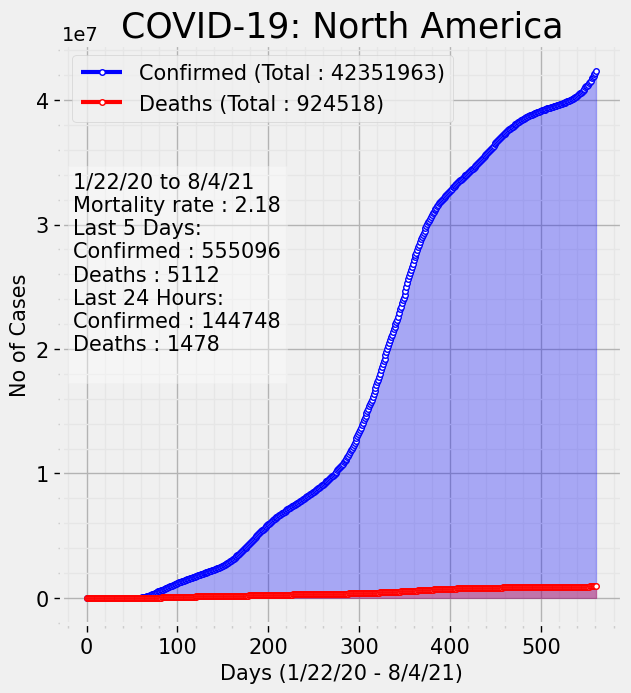

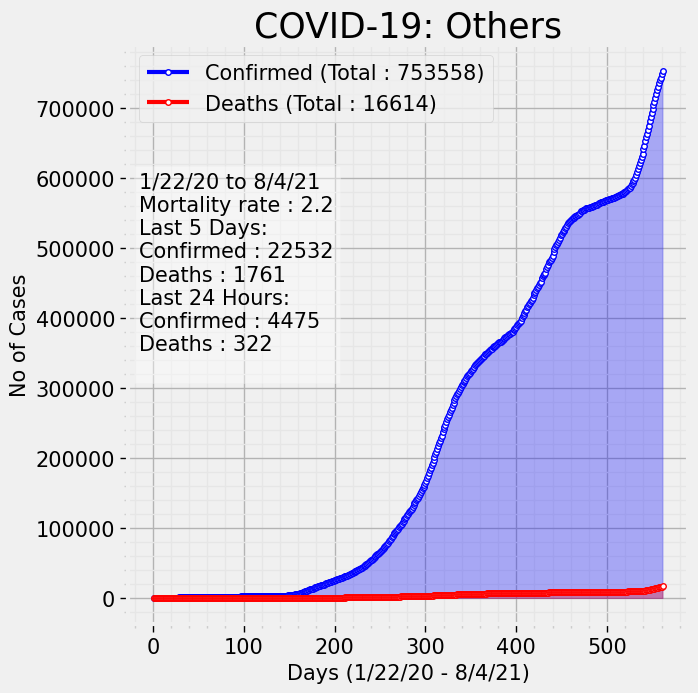

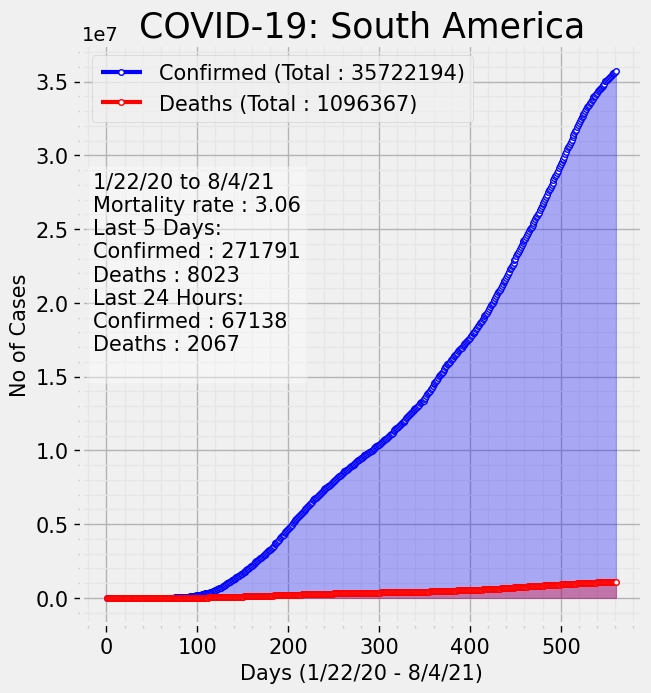

In [158]:
#visualize covid
for continent in continent_df.index:
    visualize_covid_cases(confirmed_df, deaths_df, continent=continent)

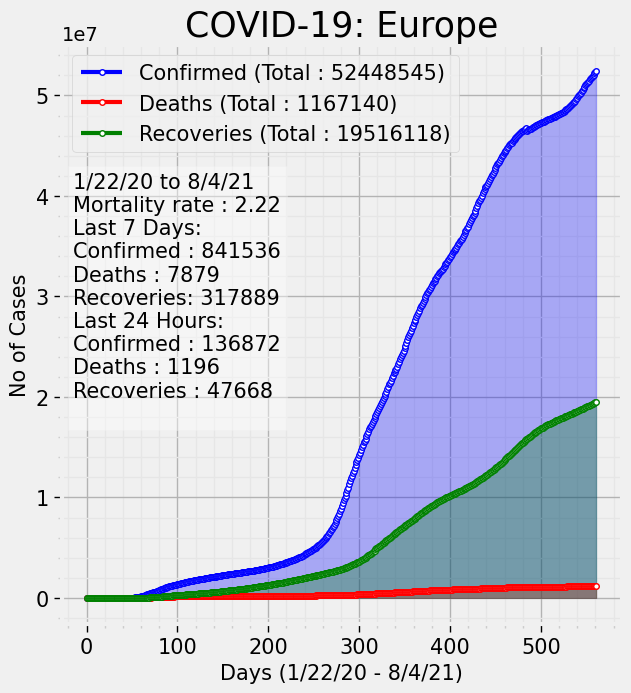

In [162]:
#visualize covid
for continent in continent_df.index:
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent=continent)

Correlation matrix:

In [326]:
sns.heatmap(continent_df.corr(), annot=True)

<AxesSubplot:>

# Pie label by Continent breakdown:

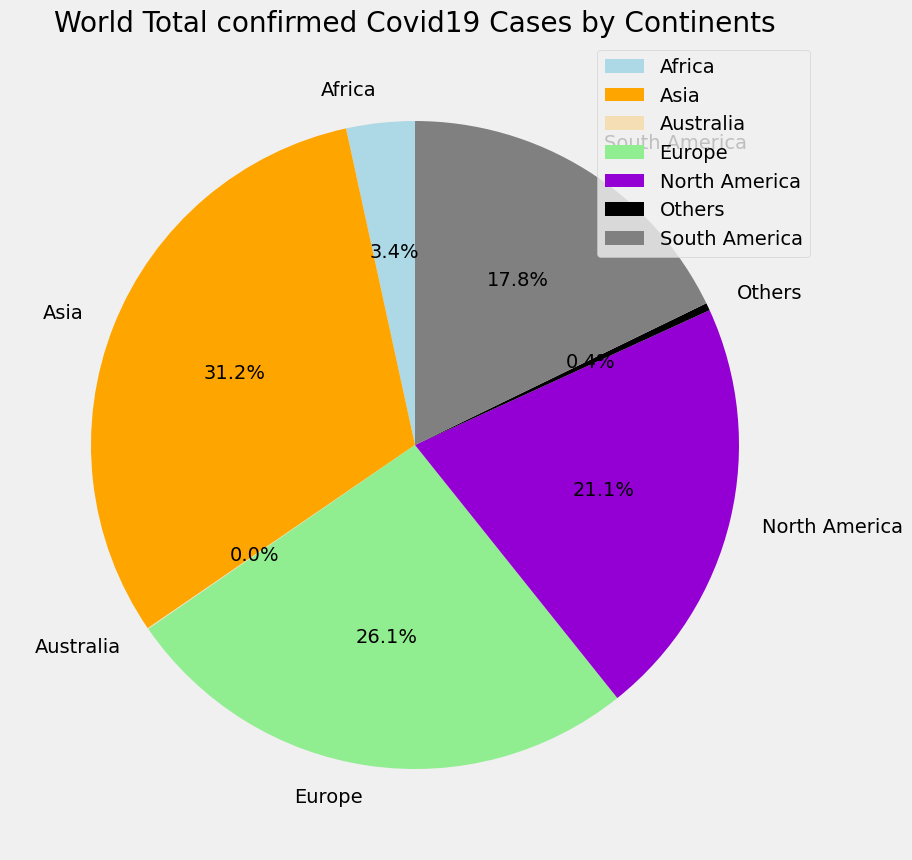

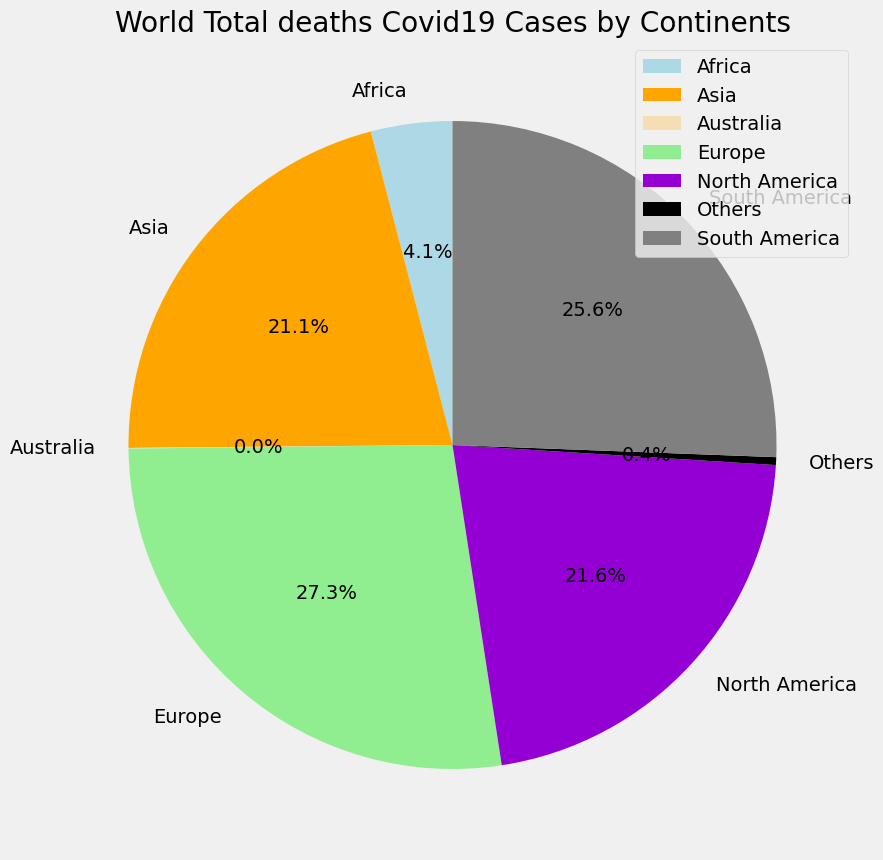

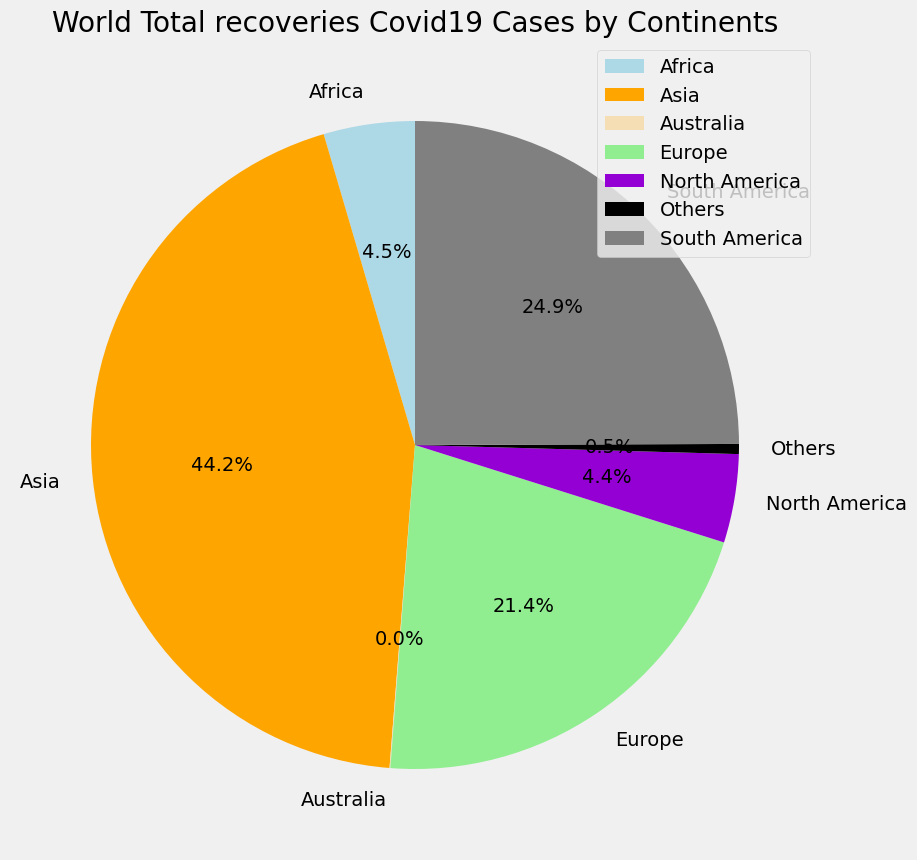

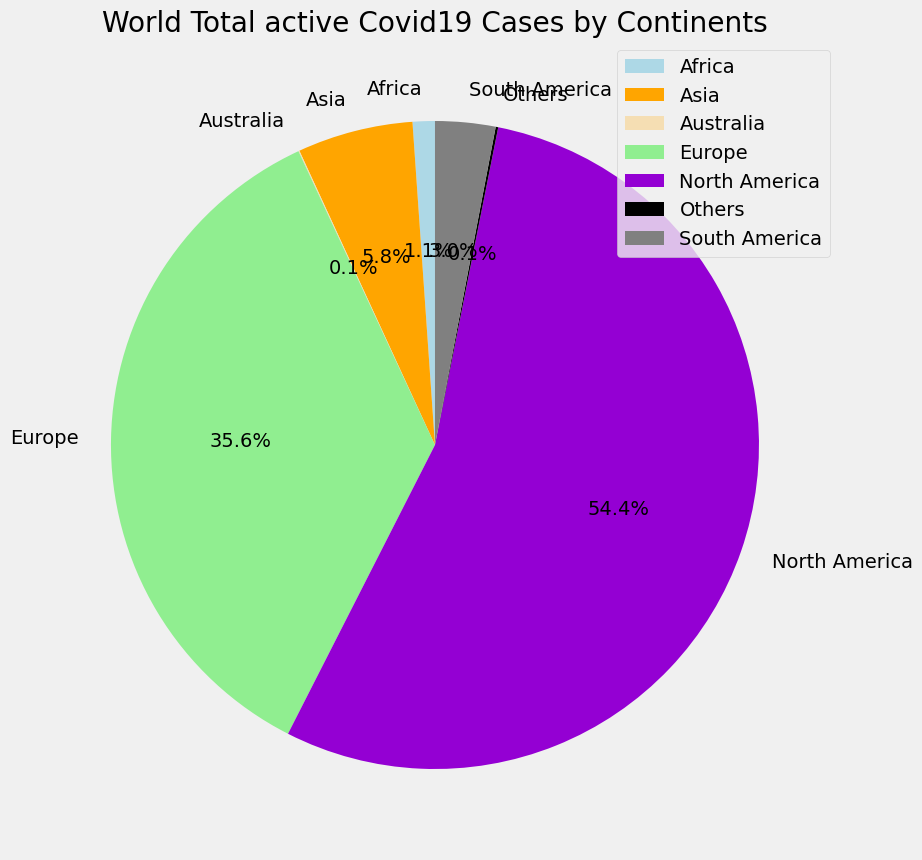

In [365]:
#additions for the piechart
colors = ['lightblue', 'orange', 'wheat', 'lightgreen', 'darkviolet', 'black', 'grey']

#loop over coloumn in continent_df
for i in range(4):
    #adjust figure size
    plt.figure(figsize=(10,10))
    
    #plot
    plt.pie(continent_df.iloc[:,i], labels=continent_df.index, colors=colors, autopct='%1.1f%%',startangle=90)
    
    #add titles and legends
    plt.title('World Total {} Covid19 Cases by Continents'.format(continent_df.columns[i]))
    plt.legend()
    
    #display
    plt.show()

# 6. EDA by Country

Map by Total Infection:

In [463]:
#data preprocessing
confirmed_df['Total'] = confirmed_df.iloc[:,5:].sum(axis=1)
confirmed_df.dropna(subset=['Lat','Long'],inplace=True)

# instantiate a feature group for the incidents in the dataframe
world = folium.Map()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, tot in zip(confirmed_df.Lat, confirmed_df.Long, confirmed_df.Total):
    world.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= tot/1000000000000000000000, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.3
        )
    )

world

Map by total death:

In [465]:
#data preprocessing
deaths_df['Total'] = deaths_df.iloc[:,5:].sum(axis=1)
deaths_df.dropna(subset=['Lat','Long'],inplace=True)

# instantiate a feature group for the incidents in the dataframe
world = folium.Map()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, tot in zip(deaths_df.Lat, deaths_df.Long, deaths_df.Total):
    world.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= tot/1000000000000000000000, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.3
        )
    )

world

Map by total recoveries:

In [469]:
#data preprocessing
recoveries_df['Total'] = recoveries_df.iloc[:,5:].sum(axis=1)
recoveries_df.dropna(subset=['Lat','Long'],inplace=True)

# instantiate a feature group for the incidents in the dataframe
world = folium.Map()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, tot in zip(recoveries_df.Lat, recoveries_df.Long, recoveries_df.Total):
    world.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= tot/1000000000000000000000, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.3
        )
    )

world

Map by death_rate:

In [476]:
#data preprocessing
deaths_rate_df = deaths_df.merge(confirmed_df, on=['Country/Region','Province/State'], how='left')
deaths_rate_df['death_rate'] = deaths_rate_df['Total_x']/deaths_rate_df['Total_y']

# instantiate a feature group for the incidents in the dataframe
world = folium.Map()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, tot in zip(deaths_rate_df.Lat_x, deaths_rate_df.Long_x, deaths_rate_df.death_rate):
    world.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= tot/1000000000000000000000, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='black',
            fill_opacity=0.3
        )
    )

world

In [62]:
#data preprocessing
country_df['Country/Region'] = country_df.index
country_df['log10active'] = np.log10(country_df['active'])

#plotting
fig = px.choropleth(country_df, locations='Country/Region', color='log10active', hover_name = 'Country/Region', 
                    color_continuous_scale='Spectral', locationmode='country names')

#display
fig.show()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log10



# Top 10 country by infection rate (using interactive plot in plotly):

In [383]:
top_10 = country_df.sort_values(by='confirmed',ascending=False).head(10)
top_10

continent  confirmed  deaths  recoveries    active  \
Country/Region                                                           
USA             North America   35460776  611222           0  34849554   
India                    Asia   31812114  426290    30974748    411076   
Brazil          South America   20034407  559944    17771228   1703235   
Russia                 Europe    6274006  159032     5609682    505292   
France                 Europe    6272466  112245      415111   5745110   
United Kingdom         Europe    5980830  157209       24693   5798928   
Turkey                   Asia    5822487   51767     5478185    292535   
Argentina       South America    4975616  106747     4615834    253035   
Colombia        South America    4815063  121695     4615354     78014   
Spain                  Europe    4545184   81844      150376   4312964   

                mortality_rate  
Country/Region                  
USA                   1.723657  
India                 1.340024  
Brazil                2.794912  
Russia                2.534776  
France                1.789488  
United Kingdom        2.628548  
Turkey                0.889087  
Argentina             2.145403  
Colombia              2.527381  
Spain                 1.800675

In [386]:
fig = px.bar(top_10, x=top_10.index, y=['deaths','recoveries','active'], title='Top 10 countries by confirmed cases')
fig.show()

# Have the world reach the pandemic climax in 2021 ?


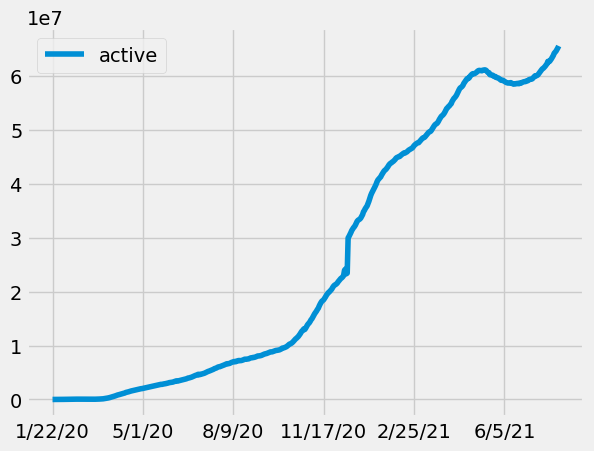

In [202]:
#convert to date
confirmed_by_date = confirmed_df.iloc[:,5:].sum(axis=0)
deaths_by_date = deaths_df.iloc[:,5:].sum(axis=0)
recoveries_by_date = recoveries_df.iloc[:,5:].sum(axis=0)
concat_by_date = pd.concat([confirmed_by_date, deaths_by_date, recoveries_by_date], axis=1, sort=False)
concat_by_date.rename(columns={0:"confirmed", 1:"deaths", 2:"recoveries"},inplace=True)

#create active column
concat_by_date['active'] = concat_by_date["confirmed"] - (concat_by_date["deaths"] + concat_by_date['recoveries'])

#plotting
concat_by_date.plot(y='active')

#display
plt.show()

Continent that has highest mortality rate:

In [406]:
continent_df.sort_values(by='mortality_rate',ascending=False).head(1)

confirmed   deaths  recoveries   active  mortality_rate
continent                                                             
South America   35722194  1096367    32656668  1969159         3.35602

Continent that has highest infection rate:

In [408]:
continent_df.sort_values(by='confirmed',ascending=False).head(1)

confirmed  deaths  recoveries   active  mortality_rate
continent                                                        
Asia        62536726  902952    57853343  3780431          1.9198

Continent that has highest recovered rate:

In [411]:
continent_df['recovery_rate'] = (continent_df['recoveries']/continent_df['confirmed'])
continent_df.sort_values(by='recovery_rate',ascending=True).tail(1)

confirmed  deaths  recoveries   active  mortality_rate  \
continent                                                           
Asia        62536726  902952    57853343  3780431          1.9198   

           recovery_rate  
continent                 
Asia             0.92511

Nation that has highest death rate:

In [399]:
country_df.sort_values(by='mortality_rate',ascending=False).head(1)

continent  confirmed  deaths  recoveries  active  \
Country/Region                                                     
Vanuatu         Australia          4       1           3       0   

                mortality_rate  
Country/Region                  
Vanuatu                   25.0

Nation that has highest infection rate:

In [401]:
country_df.sort_values(by='confirmed',ascending=False).head(1)

continent  confirmed  deaths  recoveries    active  \
Country/Region                                                           
USA             North America   35460776  611222           0  34849554   

                mortality_rate  
Country/Region                  
USA                   1.723657

Nation that has highest recovery rate:

In [404]:
country_df['recovery_rate'] = country_df['recoveries']/country_df['confirmed']
country_df.sort_values(by='recovery_rate',ascending=False).head(1)

continent  confirmed  deaths  recoveries  active  \
Country/Region                                                      
Solomon Islands  Australia         20       0          20       0   

                 mortality_rate  recovery_rate  
Country/Region                                  
Solomon Islands             0.0            1.0

# USA Summary

In [3]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [32]:
us_medical_data

Province_State Country_Region         Last_Update      Lat  \
0                    Alabama             US 2020-07-07 04:34:13  32.3182   
1                     Alaska             US 2020-07-07 04:34:13  61.3707   
2             American Samoa             US 2020-07-07 04:34:13 -14.2710   
3                    Arizona             US 2020-07-07 04:34:13  33.7298   
4                   Arkansas             US 2020-07-07 04:34:13  34.9697   
5                 California             US 2020-07-07 04:34:13  36.1162   
6                   Colorado             US 2020-07-07 04:34:13  39.0598   
7                Connecticut             US 2020-07-07 04:34:13  41.5978   
8                   Delaware             US 2020-07-07 04:34:13  39.3185   
9           Diamond Princess             US 2020-07-07 04:34:13      NaN   
10      District of Columbia             US 2020-07-07 04:34:13  38.8974   
11                   Florida             US 2020-07-07 04:34:13  27.7663   
12                   Georgia             US 2020-07-07 04:34:13  33.0406   
13            Grand Princess             US 2020-07-07 04:34:13      NaN   
14                      Guam             US 2020-07-07 04:34:13  13.4443   
15                    Hawaii             US 2020-07-07 04:34:13  21.0943   
16                     Idaho             US 2020-07-07 04:34:13  44.2405   
17                  Illinois             US 2020-07-07 04:34:13  40.3495   
18                   Indiana             US 2020-07-07 04:34:13  39.8494   
19                      Iowa             US 2020-07-07 04:34:13  42.0115   
20                    Kansas             US 2020-07-07 04:34:13  38.5266   
21                  Kentucky             US 2020-07-07 04:34:13  37.6681   
22                 Louisiana             US 2020-07-07 04:34:13  31.1695   
23                     Maine             US 2020-07-07 04:34:13  44.6939   
24                  Maryland             US 2020-07-07 04:34:13  39.0639   
25             Massachusetts             US 2020-07-07 04:34:13  42.2302   
26                  Michigan             US 2020-07-07 04:34:13  43.3266   
27                 Minnesota             US 2020-07-07 04:34:13  45.6945   
28               Mississippi             US 2020-07-07 04:34:13  32.7416   
29                  Missouri             US 2020-07-07 04:34:13  38.4561   
30                   Montana             US 2020-07-07 04:34:13  46.9219   
31                  Nebraska             US 2020-07-07 04:34:13  41.1254   
32                    Nevada             US 2020-07-07 04:34:13  38.3135   
33             New Hampshire             US 2020-07-07 04:34:13  43.4525   
34                New Jersey             US 2020-07-07 04:34:13  40.2989   
35                New Mexico             US 2020-07-07 04:34:13  34.8405   
36                  New York             US 2020-07-07 04:34:13  42.1657   
37            North Carolina             US 2020-07-07 04:34:13  35.6301   
38              North Dakota             US 2020-07-07 04:34:13  47.5289   
39  Northern Mariana Islands             US 2020-07-07 04:34:13  15.0979   
40                      Ohio             US 2020-07-07 04:34:13  40.3888   
41                  Oklahoma             US 2020-07-07 04:34:13  35.5653   
42                    Oregon             US 2020-07-07 04:34:13  44.5720   
43              Pennsylvania             US 2020-07-07 04:34:13  40.5908   
44               Puerto Rico             US 2020-07-07 04:34:13  18.2208   
45              Rhode Island             US 2020-07-07 04:34:13  41.6809   
46            South Carolina             US 2020-07-07 04:34:13  33.8569   
47              South Dakota             US 2020-07-07 04:34:13  44.2998   
48                 Tennessee             US 2020-07-07 04:34:13  35.7478   
49                     Texas             US 2020-07-07 04:34:13  31.0545   
50                      Utah             US 2020-07-07 04:34:13  40.1500   
51                   Vermont             US 2020-07-07 04:34:1

Highest mortality rate:

In [5]:
us_medical_data.sort_values(by='Mortality_Rate',ascending=False).head(1)

Province_State Country_Region          Last_Update      Lat    Long_  \
7    Connecticut             US  2020-07-07 04:34:13  41.5978 -72.7554   

   Confirmed  Deaths  Recovered   Active  FIPS  ...  Total_Test_Results  \
7      46976    4338     8210.0  34428.0     9  ...                 NaN   

   People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
7              10411.0                  NaN  84000009.0   USA  14707.483577   

   Hospitalization_Rate        Date People_Tested  Mortality_Rate  
7             22.162381  2020-07-06      524364.0        9.234503  

[1 rows x 21 columns]

Highest infection rate:

In [6]:
us_medical_data.sort_values(by='Confirmed', ascending=False).head(1)

Province_State Country_Region          Last_Update      Lat    Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657 -74.9481   

    Confirmed  Deaths  Recovered    Active  FIPS  ...  Total_Test_Results  \
36     397649   32057    71040.0  294552.0    36  ...           4288131.0   

    People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
36              89995.0                  NaN  84000036.0   USA  22042.910293   

    Hospitalization_Rate        Date People_Tested  Mortality_Rate  
36             22.631768  2020-07-06     4288131.0        8.061632  

[1 rows x 21 columns]

Highest recovered rate:

In [397]:
us_medical_data['Recovered_rate'] = us_medical_data['Recovered']/us_medical_data['Confirmed']
us_medical_data.sort_values(by='Recovered_rate',ascending=False).head(1)

Province_State Country_Region          Last_Update      Lat    Long_  \
27      Minnesota             US  2020-07-07 04:34:13  45.6945 -93.9002   

    Confirmed  Deaths  Recovered  Active  FIPS  ...  People_Hospitalized  \
27      38569    1511    33907.0  3151.0    27  ...               4219.0   

    Case_Fatality_Ratio         UID  ISO3  Testing_Rate Hospitalization_Rate  \
27                  NaN  84000027.0   USA  12052.080703            10.938837   

          Date  People_Tested Mortality_Rate  Recovered_rate  
27  2020-07-06       679693.0       3.917654        0.879126  

[1 rows x 22 columns]

Visualization:

In [39]:
#plotting
fig = px.choropleth(us_medical_data, locations='Province_State', color='Confirmed', hover_name = 'Country_Region', 
                    color_continuous_scale='Spectral', locationmode='USA-states')

#display
fig.show()